### More about graphs

In [144]:
using Graphs, Plots, GraphRecipes

There are two things to look at here: 
1. a shortest path through a complete graph.  This is known as the Travelling Salesperson problem
2. A shortest path between two vertices in a graph. This is known as the Shortest Path problem. 

#### Traveling Salesperson Problem

Consider a complete graph. We'll use one with 5 vertices as an example:

In [145]:
g = complete_graph(5)

{5, 10} undirected simple Int64 graph

In [146]:
g_weights = Dict(
  (1,2) => 5,
  (1,3) => 7,
  (1,4) => 3,
  (1,5) => 10,
  (2,3) => 6,
  (2,4) => 7,
  (2,5) => 3,
  (3,4) => 8,
  (3,5) => 5,
  (4,5) => 8,
)

Dict{Tuple{Int64, Int64}, Int64} with 10 entries:
  (2, 4) => 7
  (1, 2) => 5
  (4, 5) => 8
  (2, 5) => 3
  (1, 3) => 7
  (3, 4) => 8
  (1, 4) => 3
  (2, 3) => 6
  (1, 5) => 10
  (3, 5) => 5

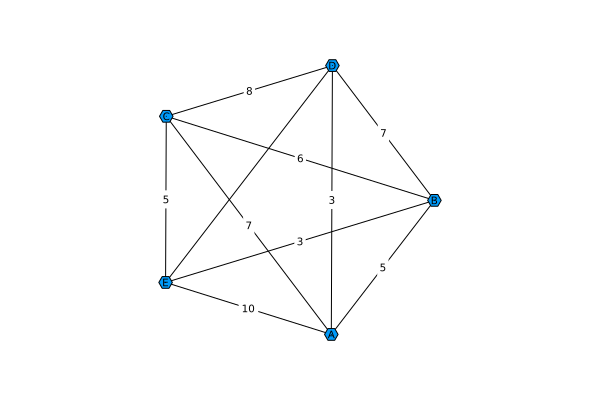

In [148]:
graphplot(g, names=["A","B","C","D","E"], edgelabel=g_weights, curves = false)

We're going to find a shortest path from A through all other nodes and back to A.  We will do this in a brute force manner in that we go through all paths in the graph.  Here's an example:

In [149]:
dist = g_weights[(1,2)]+g_weights[(2,3)]+g_weights[(3,4)]+g_weights[(4,5)]+g_weights[(1,5)]

37

If we have a path in the array p, then the following will find the path

In [150]:
function pathDistance(p::Vector{Int})
  dist = 0
  for i=1:length(p)-1
    dist += haskey(g_weights,(p[i],p[i+1])) ? g_weights[(p[i],p[i+1])] : g_weights[(p[i+1],p[i])]
  end
  dist + (haskey(g_weights,(p[1],p[end])) ? g_weights[(p[1],p[end])] : g_weights[(p[end],p[1])])
end

pathDistance (generic function with 1 method)

In [151]:
pathDistance(collect(1:5))

37

In [152]:
pathDistance([3,1,2,5,4])

31

In [153]:
using Combinatorics

Now, we will find all paths, by using the permutaions of the array from 1 to 5

In [154]:
nthperm([1,2,3,4],1)

4-element Vector{Int64}:
 1
 2
 3
 4

In [155]:
nthperm([1,2,3,4],2)

4-element Vector{Int64}:
 1
 2
 4
 3

In [156]:
perms = map(k->nthperm([1,2,3,4],k),1:24)

24-element Vector{Vector{Int64}}:
 [1, 2, 3, 4]
 [1, 2, 4, 3]
 [1, 3, 2, 4]
 [1, 3, 4, 2]
 [1, 4, 2, 3]
 [1, 4, 3, 2]
 [2, 1, 3, 4]
 [2, 1, 4, 3]
 [2, 3, 1, 4]
 [2, 3, 4, 1]
 [2, 4, 1, 3]
 [2, 4, 3, 1]
 [3, 1, 2, 4]
 [3, 1, 4, 2]
 [3, 2, 1, 4]
 [3, 2, 4, 1]
 [3, 4, 1, 2]
 [3, 4, 2, 1]
 [4, 1, 2, 3]
 [4, 1, 3, 2]
 [4, 2, 1, 3]
 [4, 2, 3, 1]
 [4, 3, 1, 2]
 [4, 3, 2, 1]

In [157]:
dists = map(k->pathDistance(nthperm(1:5,k)),1:factorial(5))

120-element Vector{Int64}:
 37
 27
 35
 32
 24
 31
 38
 27
 35
 31
 25
 32
 31
  ⋮
 32
 25
 27
 31
 24
 35
 27
 27
 32
 38
 31
 37

In [158]:
findmin(dists)

(24, 5)

This shows that the 5th element of the list (5th permutatation) returns the minimum of 24.

In [159]:
nthperm(1:5,5)

5-element Vector{Int64}:
 1
 2
 5
 3
 4

This corresponds to A -> B -> E -> C -> D -> A

### Shortest Path Problems

Here, we are going to look at the shortest path through a weighted graph.  Although there are many algorithms to do this, we will use the $A^{\star}$ method (feel free to google if interested how it works).

First, let's make a graph

In [160]:
g2 = SimpleGraph(5)
add_edge!(g2,1,2)
add_edge!(g2,2,3)
add_edge!(g2,2,4)
add_edge!(g2,3,4)
add_edge!(g2,3,5)
add_edge!(g2,4,5)

true

And defined the weights

In [161]:
weights2 = Dict((1,2)=>1,(2,3)=>3,(2,4)=>1,(3,4)=>1,(3,5)=>2,(4,5)=>5)

Dict{Tuple{Int64, Int64}, Int64} with 6 entries:
  (2, 4) => 1
  (1, 2) => 1
  (4, 5) => 5
  (3, 4) => 1
  (2, 3) => 3
  (3, 5) => 2

These can be used to plot the graph with

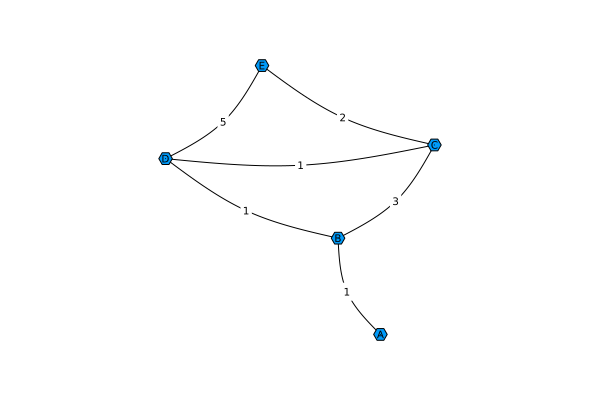

In [162]:
graphplot(g2, names=["A","B","C","D","E"], edgelabel=weights2)

The function below to find the shortest path needs the weights to be stored as a matrix.  We can pull the information out of Dictionary as:

In [163]:
w = zeros(Int,5,5)
for i=1:5
  for j=1:5
    if haskey(weights2,(i,j))
      w[i,j] = weights2[(i,j)]
      w[j,i] = weights2[(i,j)]
    end
  end
end
w

5×5 Matrix{Int64}:
 0  1  0  0  0
 1  0  3  1  0
 0  3  0  1  2
 0  1  1  0  5
 0  0  2  5  0

As an example, let's find the shortest path from vertex A to D

In [164]:
short_path = a_star(g2,1,4,w)

2-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 2
 Edge 2 => 4

This shows that path is 1 => 2 => 4 or A, B, D.  You'll need to pull these values out programmatically. You can do this with the .dst and .src fields

In [165]:
short_path[1].src,short_path[1].dst

(1, 2)

In [166]:
short_path[2].src,short_path[2].dst

(2, 4)

Here's the shortest path from vertex A to E:

In [167]:
short_path2 = a_star(g2,1,5, w)

4-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 2
 Edge 2 => 4
 Edge 4 => 3
 Edge 3 => 5